In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, calculate_kmo
from scipy.stats import bartlett

In [2]:
# Load CSV file
data = pd.read_csv("C:/Users/devli/Downloads/Top_100_batsman (1).csv")
print(data.head())

   POS          PLAYER  Mat  Inns  NO  Runs    HS    Avg     BF      SR  100s  \
0    1      ViratKohli  177   169  26  5412   113  37.84  4,112  131.61     5   
1    2    Suresh Raina  193   189  28  5368  100*  33.34  3,914  137.14     1   
2    3    Rohit Sharma  188   183  28  4898  109*  31.60  3,744  130.82     1   
3    4    David Warner  126   126  17  4706   126  43.17  3,305  142.39     4   
4    5  Shikhar Dhawan  159   158  21  4579   97*  33.42  3,669  124.80     0   

   50s   4s   6s  
0   36  480  190  
1   38  493  194  
2   36  431  194  
3   44  458  181  
4   37  524   96  


In [3]:
#relevant numerical columns for factor analysis
numerical_data = data[['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100s', '50s', '4s', '6s']]

In [18]:
# Make sure to replace the column with .loc to avoid SettingWithCopyWarning
numerical_data.loc[:, 'HS'] = numerical_data['HS'].replace({'\*': '', ',': ''}, regex=True).astype(float)


In [19]:
# Create a copy explicitly
numerical_data = numerical_data.copy()
numerical_data['HS'] = numerical_data['HS'].replace({'\*': '', ',': ''}, regex=True).astype(float)


In [6]:
# Check for missing values after cleaning
print(numerical_data.isnull().sum())

Mat      0
Inns     0
NO       0
Runs     0
HS       0
Avg      0
BF      55
SR       0
100s     0
50s      0
4s       0
6s       0
dtype: int64


In [7]:
#drop rows with missing values
numerical_data = numerical_data.dropna()

#Correlation matrix

In [8]:
# Calculate and visualize the correlation matrix
correlation_matrix = numerical_data.corr()

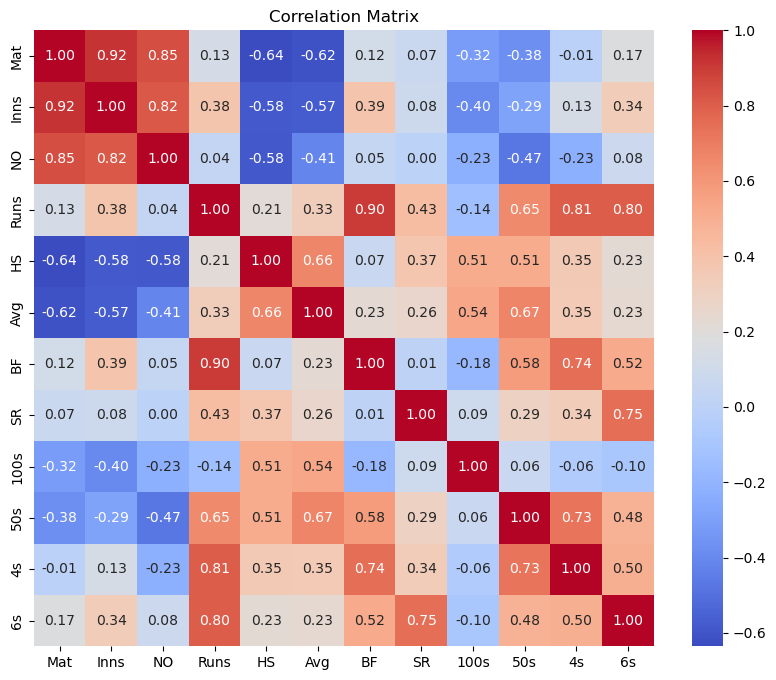

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# KMO Score

In [10]:
# Calculate KMO score
kmo_all, kmo_model = calculate_kmo(numerical_data)
print(f'KMO Score: {kmo_model}')

KMO Score: 0.6245921032558873


#Bartlett's test

In [11]:
# Perform Bartlett's test
chi_square_value, p_value = bartlett(*[numerical_data[col] for col in numerical_data.columns])
print(f'Bartlett’s test: Chi-square value = {chi_square_value}, p-value = {p_value}')

Bartlett’s test: Chi-square value = 1786.6165910740592, p-value = 0.0


# Factor Analysis Model

In [12]:
# Fit the factor analysis model
fa = FactorAnalyzer(n_factors=3, rotation='varimax')  # Adjust n_factors based on your needs
fa.fit(numerical_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [13]:
# Get eigenvalues to determine how many factors to retain
eigenvalues, _ = fa.get_eigenvalues()
print(eigenvalues)

[4.63436766e+00 3.86189363e+00 1.36715531e+00 8.99835622e-01
 4.41846083e-01 3.24018224e-01 2.44990496e-01 1.53390240e-01
 4.00629100e-02 2.23182238e-02 7.47387484e-03 2.64772118e-03]


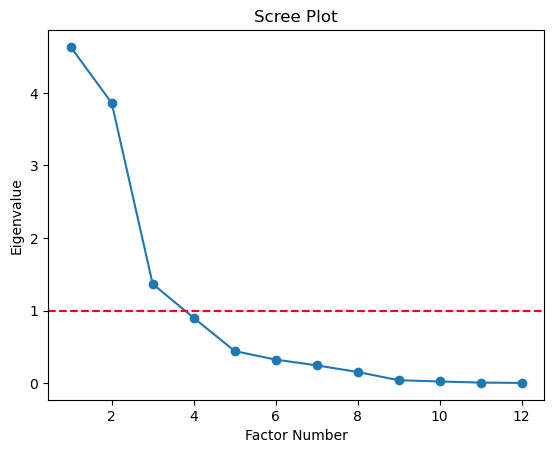

In [14]:
# Plotting eigenvalues to visualize them
plt.scatter(range(1, len(eigenvalues) + 1), eigenvalues)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [15]:
# Get factor loadings
loadings = fa.loadings_
print(loadings)

[[ 0.92171086  0.0019278   0.17009203]
 [ 0.95866035  0.2427437   0.16238622]
 [ 0.80097915 -0.10958476  0.13002094]
 [ 0.10285117  0.93281193  0.34782392]
 [-0.75483408  0.19268089  0.31873194]
 [-0.70593176  0.32595086  0.21597698]
 [ 0.15390658  0.9627973  -0.07314786]
 [-0.08465328  0.1323987   0.94111661]
 [-0.46408635 -0.14068423  0.14172008]
 [-0.48146022  0.73000228  0.16066517]
 [-0.12048139  0.8119697   0.19317553]
 [ 0.10176248  0.55945177  0.68511172]]


In [16]:
# Create a DataFrame for better visualization of loadings
loadings_df = pd.DataFrame(loadings, index=numerical_data.columns)
print(loadings_df)

             0         1         2
Mat   0.921711  0.001928  0.170092
Inns  0.958660  0.242744  0.162386
NO    0.800979 -0.109585  0.130021
Runs  0.102851  0.932812  0.347824
HS   -0.754834  0.192681  0.318732
Avg  -0.705932  0.325951  0.215977
BF    0.153907  0.962797 -0.073148
SR   -0.084653  0.132399  0.941117
100s -0.464086 -0.140684  0.141720
50s  -0.481460  0.730002  0.160665
4s   -0.120481  0.811970  0.193176
6s    0.101762  0.559452  0.685112


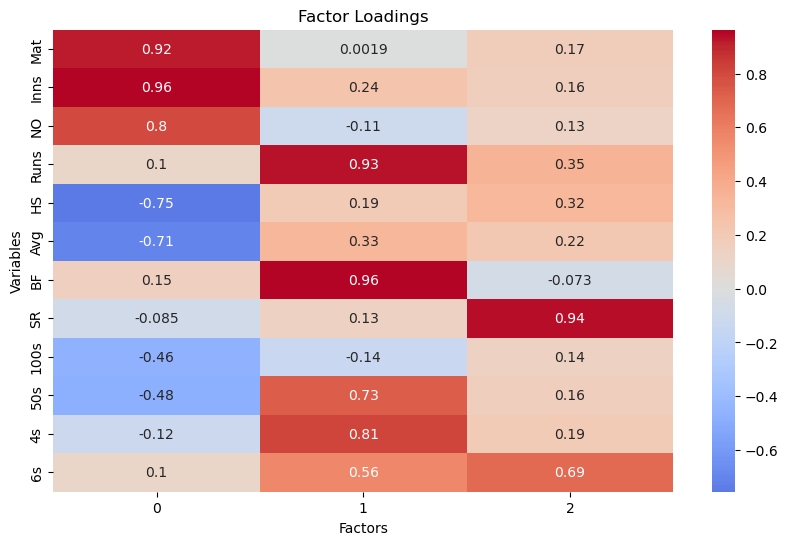

In [17]:
# Visualize Factor Loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Factor Loadings')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()

# Finished